<a href="https://colab.research.google.com/github/overclock98/PSB-2015-crowdsourced-nuclei-dataset-to-coco/blob/master/ucsb_breast_cancer_dataset__to_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mount gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


copy dataset to colab env.

In [2]:
!mkdir BreastCancer

In [3]:
ls "/content/drive/My Drive/Colab Notebooks/Datasets/breast_cancer_dataset/"

bisque-20191217.065058@        bisque-20200902.070801.tar.gz
bisque-20200808.061527.tar.gz  BreastCancer@


https://bioimage.ucsb.edu/research/bio-segmentation

In [4]:
!cp "/content/drive/My Drive/Colab Notebooks/Datasets/breast_cancer_dataset/bisque-20200902.070801.tar.gz" /content/BreastCancer
!cp "/content/drive/My Drive/Colab Notebooks/Datasets/breast_cancer_dataset/bisque-20200808.061527.tar.gz" /content/BreastCancer

In [5]:
!tar xvzf /content/BreastCancer/bisque-20200808.061527.tar.gz -C /content/BreastCancer
!tar xvzf /content/BreastCancer/bisque-20200902.070801.tar.gz -C /content/BreastCancer

Breast Cancer Cells GroundTruth/ytma55_030603_benign6.TIF
Breast Cancer Cells GroundTruth/ytma55_030603_benign6.TIF.xml
Breast Cancer Cells GroundTruth/ytma55_030603_benign5.TIF
Breast Cancer Cells GroundTruth/ytma55_030603_benign5.TIF.xml
Breast Cancer Cells GroundTruth/ytma55_030603_benign4.TIF
Breast Cancer Cells GroundTruth/ytma55_030603_benign4.TIF.xml
Breast Cancer Cells GroundTruth/ytma55_030603_benign3.TIF
Breast Cancer Cells GroundTruth/ytma55_030603_benign3.TIF.xml
Breast Cancer Cells GroundTruth/ytma55_030603_benign2.TIF
Breast Cancer Cells GroundTruth/ytma55_030603_benign2.TIF.xml
Breast Cancer Cells GroundTruth/ytma55_030603_benign1.TIF
Breast Cancer Cells GroundTruth/ytma55_030603_benign1.TIF.xml
Breast Cancer Cells GroundTruth/ytma49_111303_benign3.TIF
Breast Cancer Cells GroundTruth/ytma49_111303_benign3.TIF.xml
Breast Cancer Cells GroundTruth/ytma49_111303_benign2.TIF
Breast Cancer Cells GroundTruth/ytma49_111303_benign2.TIF.xml
Breast Cancer Cells GroundTruth/ytma49_1

In [6]:
ls /content/BreastCancer/

 bisque-20200808.061527.tar.gz  'Breast Cancer Cells GroundTruth'/
 bisque-20200902.070801.tar.gz  'Breast Cancer Cells GroundTruth.xml'
'Breast Cancer Cells'/          'Breast Cancer Cells.xml'


In [7]:
!mkdir /content/BreastCancer/img
!mkdir /content/BreastCancer/gt_img

list the dataset

In [8]:
import glob
len(glob.glob('/content/BreastCancer/Breast Cancer Cells/*.tif'))

58

In [9]:
len(glob.glob('/content/BreastCancer/Breast Cancer Cells GroundTruth/*.TIF'))

58

image augmentation and save as png

In [10]:
import cv2

for name in glob.glob('/content/BreastCancer/Breast Cancer Cells/*.tif'):
    img = cv2.imread(name)
    h, w, c = img.shape

    crop_img = img[0:int(h/2), 0:int(w/2)]
    name_1 = str(name).lstrip("content/BreastCancer/Breast Cancer Cells/")
    name_1 = "/content/BreastCancer/img/" + name_1
    name_1 = name_1.replace("_ccd.tif", "1.png")
    cv2.imwrite(name_1, crop_img)

    crop_img = img[0:int(h/2), int(w/2):w]
    name_2 = str(name).lstrip("content/BreastCancer/Breast Cancer Cells/")
    name_2 = "/content/BreastCancer/img/" + name_2
    name_2 = name_2.replace("_ccd.tif", "2.png")
    cv2.imwrite(name_2, crop_img)

    crop_img = img[int(h/2):h, 0:int(w/2)]
    name_3 = str(name).lstrip("content/BreastCancer/Breast Cancer Cells/")
    name_3 = "/content/BreastCancer/img/" + name_3
    name_3 = name_3.replace("_ccd.tif", "3.png")
    cv2.imwrite(name_3, crop_img)

    crop_img = img[int(h/2):h, int(w/2):w]
    name_4 = str(name).lstrip("content/BreastCancer/Breast Cancer Cells/")
    name_4 = "/content/BreastCancer/img/" + name_4
    name_4 = name_4.replace("_ccd.tif", "4.png")
    cv2.imwrite(name_4, crop_img)

In [11]:
len(glob.glob('/content/BreastCancer/img/*.png'))

232

In [12]:
for name in glob.glob('/content/BreastCancer/Breast Cancer Cells GroundTruth/*.TIF'):
    img = cv2.imread(name)
    h, w, c = img.shape

    crop_img = img[0:int(h/2), 0:int(w/2)]
    name_1 = str(name).lstrip("content/BreastCancer/Breast Cancer Cells GroundTruth/")
    name_1 = "/content/BreastCancer/gt_img/" + name_1
    name_1 = name_1.replace(".TIF", "1.png")
    cv2.imwrite(name_1, crop_img)

    crop_img = img[0:int(h/2), int(w/2):w]
    name_2 = str(name).lstrip("content/BreastCancer/Breast Cancer Cells GroundTruth")
    name_2 = "/content/BreastCancer/gt_img/" + name_2
    name_2 = name_2.replace(".TIF", "2.png")
    cv2.imwrite(name_2, crop_img)

    crop_img = img[int(h/2):h, 0:int(w/2)]
    name_3 = str(name).lstrip("content/BreastCancer/Breast Cancer Cells GroundTruth")
    name_3 = "/content/BreastCancer/gt_img/" + name_3
    name_3 = name_3.replace(".TIF", "3.png")
    cv2.imwrite(name_3, crop_img)

    crop_img = img[int(h/2):h, int(w/2):w]
    name_4 = str(name).lstrip("content/BreastCancer/Breast Cancer Cells GroundTruth")
    name_4 = "/content/BreastCancer/gt_img/" + name_4
    name_4 = name_4.replace(".TIF", "4.png")
    cv2.imwrite(name_4, crop_img)

In [13]:
len(glob.glob('/content/BreastCancer/gt_img/*.png'))

232

install pycocotools to convert masks to coco format

In [14]:
!pip install git+git://github.com/waspinator/coco.git@2.1.0

  Cloning git://github.com/waspinator/coco.git (to revision 2.1.0) to /tmp/pip-req-build-zw12q1q7
  Running command git clone -q git://github.com/waspinator/coco.git /tmp/pip-req-build-zw12q1q7
  Running command git checkout -q cd69b031a5dafdd40c0b2c52bd4a9c5d7f11382e
  Created wheel for pycocotools: filename=pycocotools-2.1-cp36-cp36m-linux_x86_64.whl size=285465 sha256=a54959f7b24ecec80f2e1f7816947e320185e64cca678a9392f9bf8fb270fadb
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ngibx10/wheels/42/68/4d/0ae439f3aece2e517244d3194de0db684e0e3d3b73bdbd5533
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.1
    Uninstalling pycocotools-2.0.1:
      Successfully uninstalled pycocotools-2.0.1


In [15]:
#!git clone https://github.com/waspinator/pycococreator.git
!git clone https://github.com/TathyaEarth/pycococreator.git

Cloning into 'pycococreator'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 185 (delta 6), reused 11 (delta 2), pack-reused 165
Receiving objects: 100% (185/185), 188.00 KiB | 5.70 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [16]:
!mkdir /content/pycococreator/ucsb_dataset
!mkdir /content/pycococreator/ucsb_dataset/Original_Images
!mkdir /content/pycococreator/ucsb_dataset/Original_Images/malignant
!mkdir /content/pycococreator/ucsb_dataset/Original_Images/benign

split dataset into test and train using split-folders

In [17]:
import shutil
import glob

for name in glob.glob('/content/BreastCancer/img/*malignant*'):
    name = str(name).lstrip("/content/BreastCancer/img/")
    source = "/content/BreastCancer/img/"+name
    destination = "/content/pycococreator/ucsb_dataset/Original_Images/malignant/"+name
    dest = shutil.copyfile(source, destination)

In [18]:
for name in glob.glob('/content/BreastCancer/img/*benign*'):
    name = str(name).lstrip("/content/BreastCancer/img/")
    source = "/content/BreastCancer/img/"+name
    destination = "/content/pycococreator/ucsb_dataset/Original_Images/benign/"+name
    dest = shutil.copyfile(source, destination)

In [19]:
len(glob.glob('/content/pycococreator/ucsb_dataset/Original_Images/benign/*.png'))

128

In [20]:
len(glob.glob('/content/pycococreator/ucsb_dataset/Original_Images/malignant/*.png'))

104

In [21]:
!pip install split-folders

In [22]:
import splitfolders
splitfolders.ratio("/content/pycococreator/ucsb_dataset/Original_Images", output="/content/pycococreator/ucsb_dataset", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 232 files [00:00, 1818.27 files/s]


move files to requerd dir.

In [23]:
!mv /content/pycococreator/ucsb_dataset/train/benign/* /content/pycococreator/ucsb_dataset/train/
!mv /content/pycococreator/ucsb_dataset/train/malignant/* /content/pycococreator/ucsb_dataset/train/
!rm -r /content/pycococreator/ucsb_dataset/train/benign
!rm -r /content/pycococreator/ucsb_dataset/train/malignant

!mv /content/pycococreator/ucsb_dataset/val/benign/* /content/pycococreator/ucsb_dataset/val/
!mv /content/pycococreator/ucsb_dataset/val/malignant/* /content/pycococreator/ucsb_dataset/val/
!rm -r /content/pycococreator/ucsb_dataset/val/benign
!rm -r /content/pycococreator/ucsb_dataset/val/malignant

!mv /content/pycococreator/ucsb_dataset/val/ /content/pycococreator/ucsb_dataset/test/

In [24]:
!mkdir /content/pycococreator/ucsb_dataset/test_ann
!mkdir /content/pycococreator/ucsb_dataset/train_ann

In [25]:
ls /content/pycococreator/ucsb_dataset

Original_Images/  test/  test_ann/  train/  train_ann/


In [26]:
for name in glob.glob('/content/pycococreator/ucsb_dataset/test/*.png'):
    name = str(name).lstrip("/content/pycococreator/")
    name = str(name).lstrip("ucsb_dataset/test/")
    source = "/content/BreastCancer/gt_img/"+name
    destination = "/content/pycococreator/ucsb_dataset/test_ann/"+name
    dest = shutil.copyfile(source, destination)

In [27]:
for name in glob.glob('/content/pycococreator/ucsb_dataset/train/*.png'):
    name = str(name).lstrip("/content/pycococreator/ucsb_dataset")
    name = str(name).lstrip("in/")
    source = "/content/BreastCancer/gt_img/"+name
    destination = "/content/pycococreator/ucsb_dataset/train_ann/"+name
    dest = shutil.copyfile(source, destination)

list test and train dir.

In [28]:
print(len(glob.glob('/content/pycococreator/ucsb_dataset/test/*.png')))
print(len(glob.glob('/content/pycococreator/ucsb_dataset/test_ann/*.png')))

print(len(glob.glob('/content/pycococreator/ucsb_dataset/train/*.png')))
print(len(glob.glob('/content/pycococreator/ucsb_dataset/train_ann/*.png')))

47
47
185
185


In [29]:
!rm -r /content/pycococreator/ucsb_dataset/Original_Images

In [30]:
ls /content/pycococreator/ucsb_dataset

test/  test_ann/  train/  train_ann/


change filenames to coco format

In [31]:
!mv /content/pycococreator/ucsb_dataset /content/pycococreator/ucsb_dataset_1

In [32]:
!mkdir /content/pycococreator/ucsb_dataset
!mkdir /content/pycococreator/ucsb_dataset/test
!mkdir /content/pycococreator/ucsb_dataset/train
!mkdir /content/pycococreator/ucsb_dataset/test_ann
!mkdir /content/pycococreator/ucsb_dataset/train_ann

In [33]:
ls /content/pycococreator/ucsb_dataset

test/  test_ann/  train/  train_ann/


In [34]:
for name in glob.glob('/content/pycococreator/ucsb_dataset_1/test/*benign*'):
    source = name
    temp_name = name[-13:-4]
    destination = name[:35]+name[37:-13]+temp_name[-2:]+temp_name[:-2]+".png"
    dest = shutil.copyfile(source, destination)

In [35]:
for name in glob.glob('/content/pycococreator/ucsb_dataset_1/train/*benign*'):
    source = name
    temp_name = name[-13:-4]
    destination = name[:35]+name[37:-13]+temp_name[-2:]+temp_name[:-2]+".png"
    dest = shutil.copyfile(source, destination)

In [36]:
for name in glob.glob('/content/pycococreator/ucsb_dataset_1/test_ann/*benign*'):
    source = name
    temp_name = name[-13:-4]
    destination = name[:35]+name[37:-13]+temp_name[-2:]+temp_name[:-2]+".png"
    dest = shutil.copyfile(source, destination)

In [37]:
for name in glob.glob('/content/pycococreator/ucsb_dataset_1/train_ann/*benign*'):
    source = name
    temp_name = name[-13:-4]
    destination = name[:35]+name[37:-13]+temp_name[-2:]+temp_name[:-2]+".png"
    dest = shutil.copyfile(source, destination)

In [38]:
for name in glob.glob('/content/pycococreator/ucsb_dataset_1/test/*malignant*'):
    source = name
    temp_name = name[-16:-4]
    destination = name[:35]+name[37:-16]+temp_name[-2:]+temp_name[:-2]+".png"
    dest = shutil.copyfile(source, destination)

In [39]:
for name in glob.glob('/content/pycococreator/ucsb_dataset_1/train/*malignant*'):
    source = name
    temp_name = name[-16:-4]
    destination = name[:35]+name[37:-16]+temp_name[-2:]+temp_name[:-2]+".png"
    dest = shutil.copyfile(source, destination)

In [40]:
for name in glob.glob('/content/pycococreator/ucsb_dataset_1/test_ann/*malignant*'):
    source = name
    temp_name = name[-16:-4]
    destination = name[:35]+name[37:-16]+temp_name[-2:]+temp_name[:-2]+".png"
    dest = shutil.copyfile(source, destination)

In [41]:
for name in glob.glob('/content/pycococreator/ucsb_dataset_1/train_ann/*malignant*'):
    source = name
    temp_name = name[-16:-4]
    destination = name[:35]+name[37:-16]+temp_name[-2:]+temp_name[:-2]+".png"
    dest = shutil.copyfile(source, destination)

In [42]:
!rm -r /content/pycococreator/ucsb_dataset_1

generate json

In [43]:
cd /content/pycococreator

/content/pycococreator


In [44]:
import datetime
import json
import os
import re
import fnmatch
from PIL import Image
import numpy as np
from pycococreatortools import pycococreatortools

In [45]:
from google.colab.patches import cv2_imshow

In [46]:
ROOT_DIR = 'ucsb_dataset'
IMAGE_DIR = os.path.join(ROOT_DIR, "train")
ANNOTATION_DIR = os.path.join(ROOT_DIR, "train_ann")

INFO = {
    "description": "Example Dataset",
    "url": "https://github.com/waspinator/pycococreator",
    "version": "0.1.0",
    "year": 2018,
    "contributor": "waspinator",
    "date_created": datetime.datetime.utcnow().isoformat(' ')
}

LICENSES = [
    {
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License",
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
    }
]

CATEGORIES = [
    {
        'id': 1,
        'name': 'benign',
        'supercategory': 'cancer',
    },
    {
        'id': 2,
        'name': 'malignant',
        'supercategory': 'cancer',
    },
]
def filter_for_jpeg(root, files):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    
    return files

def filter_for_annotations(root, files, image_filename):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    basename_no_extension = os.path.splitext(os.path.basename(image_filename))[0]
    file_name_prefix = basename_no_extension + '.*'
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    files = [f for f in files if re.match(file_name_prefix, os.path.splitext(os.path.basename(f))[0])]

    return files

def gen_coco_json():

    coco_output = {
        "info": INFO,
        "licenses": LICENSES,
        "categories": CATEGORIES,
        "images": [],
        "annotations": []
    }

    image_id = 1
    segmentation_id = 1
    qq={"id":1}
    
    # filter for jpeg images
    for root, _, files in os.walk(IMAGE_DIR):
        image_files = filter_for_jpeg(root, files)

        # go through each image
        for image_filename in image_files:
            image = Image.open(image_filename)
            image_info = pycococreatortools.create_image_info(
                image_id, os.path.basename(image_filename), image.size)
            coco_output["images"].append(image_info)

            # filter for associated png annotations
            for root, _, files in os.walk(ANNOTATION_DIR):
                annotation_files = filter_for_annotations(root, files, image_filename)

                # go through each associated annotation
                for annotation_filename in annotation_files:
                    
                    #print(annotation_filename)
                    class_id = [x['id'] for x in CATEGORIES if x['name'] in annotation_filename][0]

                    category_info = {'id': class_id, 'is_crowd': 'crowd' in image_filename}
                    binary_mask = np.asarray(Image.open(annotation_filename)
                        .convert('1')).astype(np.uint8)
                    
                    annotation_info = pycococreatortools.create_annotation_infos(
                        segmentation_id, image_id, category_info, binary_mask,
                        image.size, tolerance=2)

                    if annotation_info is not None:
                      for ann_info_coco in annotation_info:
                        if ann_info_coco is not None:
                          coco_output["annotations"].append(ann_info_coco)
                          qq = ann_info_coco
                    
                    segmentation_id = qq["id"] + 1

            image_id = image_id + 1
            #print(annotation_info)
            #if(image_id == 220):
              #print(annotation_filename)
              #img = cv2.imread(annotation_filename, cv2.IMREAD_UNCHANGED)
              #cv2_imshow(img)
              #break

    with open('{}/train.json'.format(ROOT_DIR), 'w') as output_json_file:
        json.dump(coco_output, output_json_file)


gen_coco_json()

In [50]:
ROOT_DIR = 'ucsb_dataset'
IMAGE_DIR = os.path.join(ROOT_DIR, "test")
ANNOTATION_DIR = os.path.join(ROOT_DIR, "test_ann")

INFO = {
    "description": "Example Dataset",
    "url": "https://github.com/waspinator/pycococreator",
    "version": "0.1.0",
    "year": 2018,
    "contributor": "waspinator",
    "date_created": datetime.datetime.utcnow().isoformat(' ')
}

LICENSES = [
    {
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License",
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
    }
]

CATEGORIES = [
    {
        'id': 1,
        'name': 'benign',
        'supercategory': 'cancer',
    },
    {
        'id': 2,
        'name': 'malignant',
        'supercategory': 'cancer',
    },
]
def filter_for_jpeg(root, files):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    
    return files

def filter_for_annotations(root, files, image_filename):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    basename_no_extension = os.path.splitext(os.path.basename(image_filename))[0]
    file_name_prefix = basename_no_extension + '.*'
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    files = [f for f in files if re.match(file_name_prefix, os.path.splitext(os.path.basename(f))[0])]

    return files

def gen_coco_json():

    coco_output = {
        "info": INFO,
        "licenses": LICENSES,
        "categories": CATEGORIES,
        "images": [],
        "annotations": []
    }

    image_id = 1
    segmentation_id = 1
    qq={"id":1}
    
    # filter for jpeg images
    for root, _, files in os.walk(IMAGE_DIR):
        image_files = filter_for_jpeg(root, files)

        # go through each image
        for image_filename in image_files:
            image = Image.open(image_filename)
            image_info = pycococreatortools.create_image_info(
                image_id, os.path.basename(image_filename), image.size)
            coco_output["images"].append(image_info)

            # filter for associated png annotations
            for root, _, files in os.walk(ANNOTATION_DIR):
                annotation_files = filter_for_annotations(root, files, image_filename)

                # go through each associated annotation
                for annotation_filename in annotation_files:
                    
                    #print(annotation_filename)
                    class_id = [x['id'] for x in CATEGORIES if x['name'] in annotation_filename][0]

                    category_info = {'id': class_id, 'is_crowd': 'crowd' in image_filename}
                    binary_mask = np.asarray(Image.open(annotation_filename)
                        .convert('1')).astype(np.uint8)
                    
                    annotation_info = pycococreatortools.create_annotation_infos(
                        segmentation_id, image_id, category_info, binary_mask,
                        image.size, tolerance=2)

                    if annotation_info is not None:
                      for ann_info_coco in annotation_info:
                        if ann_info_coco is not None:
                          coco_output["annotations"].append(ann_info_coco)
                          qq = ann_info_coco
                    
                    segmentation_id = qq["id"] + 1

            image_id = image_id + 1
            #print(annotation_info)
            #if(image_id == 20):
            #  print(annotation_filename)
            #  break

    with open('{}/test.json'.format(ROOT_DIR), 'w') as output_json_file:
        json.dump(coco_output, output_json_file)


gen_coco_json()

In [51]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [54]:
image_directory = '/content/pycococreator/ucsb_dataset/train/'
annotation_file = '/content/pycococreator/ucsb_dataset/train.json'

In [55]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [56]:

categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
benign malignant

Custom COCO supercategories: 
cancer


In [57]:
category_ids = example_coco.getCatIds(catNms=['malignant'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [58]:
image_data

{'coco_url': '',
 'date_captured': '2020-09-03 14:01:19.487928',
 'file_name': 'ytma49_11130314_malignant.png',
 'flickr_url': '',
 'height': 384,
 'id': 169,
 'license': 1,
 'width': 448}

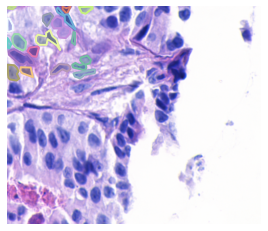

In [59]:
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

In [ ]:
*

In [63]:
!cp -r /content/pycococreator/ucsb_dataset "/content/drive/My Drive/Colab Notebooks/Datasets"